## What is Named Entity Recognition (NER)?

- NLP task to identify important named entities in the text
  - People, places, organizations
  - Dates, states, works of art
- Can be used alongside topic identification or on its own!
- To answer questions like Who? What? When? Where?


In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import defaultdict
import matplotlib.pyplot as plt
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

In [2]:
sentence = '''In New York, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichl.'''
tokenized_sent = nltk.word_tokenize(sentence)
tagged_sent = nltk.pos_tag(tokenized_sent) # This will add tags for proper nouns, pronouns, adjectives, verbs and other parts of speech
tagged_sent[:3]

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

__NNP__: Proper noun singular

In [3]:
print(nltk.ne_chunk(tagged_sent)) # NLTK tree which also have leaf's and sub trees representing more complex grammer

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


It identifies Ruth as person using training statistical parser. 

__Example 1__ identify named entities from the article

In [4]:

article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

In [5]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences,binary = True)

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


In this example, we will use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called chunked_sentences similar to the last exercise, but this time with non-binary category names.

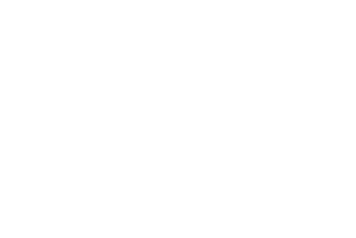

In [6]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

When using the Stanford library with NLTK we need NLTK, the Stanford Java Libraries and some environment variables to help with integration

## What is SpaCy?

- NLP library similar to gensim, with different implementations
- Focus on creating NLP pipelines to generate models and corpora
- It has tools to build word and document vectors from text
- Open-source, with extra libraries and tools
  - __Displacy__: A visualization tool for viewing parsed trees which uses nodejs to create interactive texts
  
To use SpaCy NER we have to import spaCy and download all the pretained word vectors, we can also train vectors ourselves.  

## Why use SpaCy for NER?

- Easy pipeline creation
- Different entity types compared to nltk
- Informal language corpora
  - Easily find entities in Tweets and chat messages
- Quickly growing!

## Install spaCy

1. conda install tqdm
2. conda install -c conda-forge spacy 
3. python -m spacy download en (dont forget to run anaconda prompt as admininstrator else it will not link the en model)

In [8]:
import spacy
nlp = spacy.load('en') # which functions like gensim dictionary, it has several linked objects including entity
nlp.entity # entity recognizing object from the pipeline module. It is used to find entities in the text
doc = nlp("""Berlin is the capital of Germany;and the residence of Chancellor Angela Merkel.""")
doc.ents # document entities are stored as document attributes called as ents

(Berlin, Angela Merkel)

In [9]:
print(doc.ents[0], doc.ents[0].label_)

Berlin GPE


To minimize execution times, we'll be asked to specify the keyword arguments tagger=False, parser=False, matcher=False when loading the spaCy model

In [10]:
# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article) # article is the same document we have used previously

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Uber
ORG Uber
ORG Apple
ORG Uber
ORG Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber
GPE drivers’
LOC Silicon Valley’s
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


__spaCy NER Categories that spaCy uses over nltk__

- NORP
- CARDINAL
- MONEY
- WORKOFART
- LANGUAGE
- EVENT

## Multilingual NER with polygot

## What is polyglot?

- NLP library which uses word vectors

### Why polyglot?

- Vectors for many different languages
- Word embedding for More than 130 languages!
- Also can be used for translating (english to arabic), swapping characters from one language to another